In [112]:
import pandas as pd

# Load data

In [113]:
hospital_data = pd.read_csv('hospital_mortality.csv')
hospital_data.head(5)

,PATIENT_ID,Age,Gender,Height,ICUType,BUN_Min,Creatinine_Min,GCS_Min,Glucose_Min,HCO3_Min,...,Na_Range,PaCO2_Range,PaO2_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,pH_Range,In-hospital_death
0,132539.0,54.0,0.0,-1.0,4.0,8.0,0.7,14.0,115.0,26.0,...,1.0,NaN,NaN,36.0,3.1,900.0,1.8,0.0,NaN,0
1,132540.0,76.0,1.0,175.3,2.0,16.0,0.8,3.0,105.0,21.0,...,4.0,13.0,363.0,91.0,3.4,770.0,5.9,5.6,0.11,0
2,132541.0,44.0,0.0,-1.0,3.0,3.0,0.3,5.0,119.0,24.0,...,3.0,4.0,167.0,41.0,2.3,407.0,2.5,0.0,0.04,0
3,132543.0,68.0,1.0,180.3,3.0,10.0,0.7,14.0,106.0,27.0,...,4.0,NaN,NaN,107.0,1.9,600.0,3.6,0.0,NaN,0
4,132545.0,88.0,0.0,-1.0,3.0,25.0,1.0,15.0,92.0,18.0,...,1.0,NaN,NaN,12.0,2.0,204.0,1.0,0.0,NaN,0


### How many patients have 20 or more missing feature values? 

In [114]:
## Your code here

len(hospital_data[hospital_data.isnull().sum(axis =1)>=20])

210

### What’s the difference in means of HR_min for patients that died vs survived (not counting patients with HR_min of  0)?

In [115]:
## Your code here
df = hospital_data[(hospital_data['HR_Min'] >0) & (hospital_data['HR_Min'].isnull() == False)].groupby('In-hospital_death')
df['HR_Min'].mean()

In-hospital_death
0    68.448744
1    70.123389
Name: HR_Min, dtype: float64

In [116]:
df['HR_Min'].mean()[1] - df['HR_Min'].mean()[0]

1.6746448633591484

### What is the median maximum heart rate for patients whose maximum temperature was 2 degrees Celsius higher than their minimum temperature?

In [117]:
## Your code here
hospital_data[(hospital_data['Temp_Range'] > 2)]['HR_Max'].median()

113.0

### Create a plot to analyze the relationship between median temperature, outcome (died vs. survived), and age.

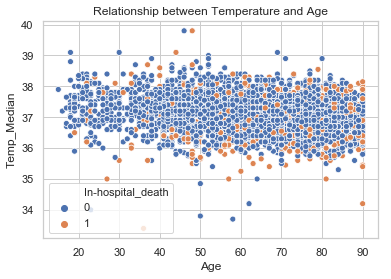

pandas.core.frame.DataFrame

In [118]:
## Your code here
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.scatterplot(x="Age", y= "Temp_Median", hue="In-hospital_death",
                     data= hospital_data)

plt.title('Relationship between Temperature and Age')
plt.show()
type(hospital_data)

### Create a plot to analyze the relationship between median temperature, outcome (died vs. survived), and gender.

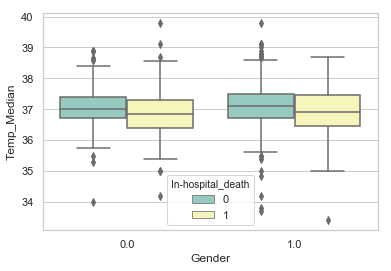

In [119]:
## Your code here

sns.set(style="whitegrid")

ax = sns.boxplot(x="Gender", y="Temp_Median", hue="In-hospital_death", data=hospital_data[hospital_data['Gender']>=0], palette="Set3")


### Build and summarize the results of a machine learning model that predicts whether a patient dies or survives in the hospital. (We do not expect a perfect or highest-accuracy solution; this is primarily an opportunity for you to show your machine learning project workflow and to document your thought process, approach to solving problems, and interpretation of results.)

In [102]:
## Your code here
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

In [130]:
print("Survived",len(hospital_data[hospital_data['In-hospital_death'] == 0]))
print("Died",len(hospital_data[hospital_data['In-hospital_death'] == 1]))

Survived 2055
Died 395


###### Data is imbalanced, hence SMOTE will applied to over-sample the minority class i.e survived(Death = 0)

In [121]:
type(hospital_data)
hospital_data.dropna(inplace= True)

X = hospital_data.iloc[:,:-1]
y = hospital_data.iloc[:,-1]


X_temp,X_test, y_temp,y_test = train_test_split(X_res,y_res, train_size= 0.8, random_state=0) 

sm = SMOTE()
X_train, y_train = sm.fit_sample(X_temp, y_temp)

m,n = X.shape

/Users/kavya/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [131]:
print("Survived",len( y_temp == 0))
print("Died",len(y_temp == 1))

Survived 2115
Died 2115


In [106]:
y.shape

(2450,)

##### Data set is high dimensional, hence dimensionality reduction is done using PCA, reducing it to number of components that explain the most variance

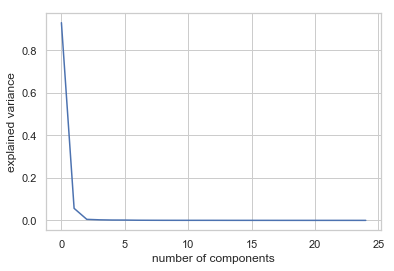

In [107]:
low_dimension_pca = PCA(n_components= min(m,n))  # project data down to a single dimension
low_dimension_data = low_dimension_pca.fit_transform(X_train)
plt.plot(low_dimension_pca.explained_variance_ratio_[:25])
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [108]:
low_dimension_pca.explained_variance_ratio_[:3].sum()

0.9909855670203744

#### Three components are used as 99% variance in data is explained.

In [109]:
from sklearn.decomposition import PCA
pcaNew = PCA(n_components=3)
pc_components = pcaNew.fit_transform(X_train)
pc_components_test = pcaNew.transform(X_test)

In [110]:
y_train.shape

(2136,)

#### Using Logistic Regression to predict whether a patient dies or survives in the hospital

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
## Instantiate a logistic regression model and fit to the training data
logR = LogisticRegression()
logR.fit(pc_components,y_train)


logR_test_pred = logR.predict(pc_components_test)

logR_test_acc = accuracy_score(y_test,logR_test_pred)

print('Logistic classifier AccuraCy:', logR_test_acc)

## Measure test recall
logR_test_recall = recall_score(y_test,logR_test_pred)

print('Logistic classifier Recall:', logR_test_recall)


logR_f1_score = f1_score(y_test,logR_test_pred)

print('Logistic classifier F1_score:', logR_f1_score)
 

logR_precision_score = precision_score(y_test,logR_test_pred)

print('Logistic classifier precision_score:', logR_precision_score)

Logistic classifier AccuraCy: 0.6219281663516069
Logistic classifier Recall: 0.7795275590551181
Logistic classifier F1_score: 0.6644295302013423
Logistic classifier precision_score: 0.5789473684210527


/Users/kavya/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Precision is 0.57 i.e out of the all people we classified as who are going to die in the hospital, 57% people are rightly classified.

Accuracy is 0.62 i.e the probability that a case is classified rightly i.e whether they wil be an in hospital death or not, 62% of them are rightly classified.

The data is imbalanced, choosing accuracy is not appropriate. 
Recall is my metric in this business problem, as False Negative is more expensive in this case i.e. classifying people who are going to die as they are going survive will cost life.

In this problem Recall on Test data is 0.77, i.e out of all the people who are going to die we are predicting 77% of the death cases.
